# Seoul Bike Trip Duration Prediction

<img src="Features_Description.png" style="float:center;" width="500"/>

### Context
Trip duration is the most fundamental measure in all modes of transportation. 
Hence, it is crucial to predict the trip-time precisely for the advancement of Intelligent Transport Systems (ITS) and traveller information systems. 
In order to predict the trip duration, data mining techniques are employed in this paper to predict the trip duration of rental bikes in Seoul Bike sharing system. 
The prediction is carried out with the combination of Seoul Bike data and weather data.
### Content
The Data used include trip duration, trip distance, pickup-dropoff latitude and longitude, 
temperature, precipitation, wind speed, humidity, solar radiation, snowfall, ground temperature and 1-hour average dust concentration.
### Acknowledgements
V E, Sathishkumar (2020), "Seoul Bike Trip duration prediction", Mendeley Data, V1, doi: 10.17632/gtfh9z865f.1
Sathishkumar V E, Jangwoo Park, Yongyun Cho, Seoul bike trip duration prediction using data mining techniques, IET Intelligent Transport Systems, doi: 10.1049/iet-its.2019.0796
### Goal
Predict the trip duration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [30]:
# 1.23 GB of data
df = pd.read_csv('data/For_modeling.csv')

In [31]:
# Drop unwanted columns
df = df.drop(columns='Unnamed: 0')
df.sample(10).T

3445535     1982790      674256      6694261      5125548  \
Duration      6.000000    5.000000    13.000000    9.000000    40.000000   
Distance    810.000000  110.000000  1960.000000  830.000000  5910.000000   
PLong        37.482189   37.494217    37.513962   37.570000    37.558910   
PLatd       126.942131  127.013786   127.121674  126.971100   126.838097   
DLong        37.481339   37.493618    37.502594   37.575947    37.581314   
DLatd       126.950645  127.014183   127.127647  126.974060   126.880585   
Haversine     0.757185    0.075254     1.369469    0.710872     4.497609   
Pmonth        7.000000    5.000000     3.000000    9.000000     8.000000   
Pday          3.000000   22.000000    28.000000   28.000000    20.000000   
Phour        11.000000    2.000000     8.000000   18.000000    18.000000   
Pmin         12.000000   12.000000    31.000000   40.000000    31.000000   
PDweek        1.000000    1.000000     2.000000    4.000000     0.000000   
Dmonth        7.000000    5.000000     3.000000    9.000000     8.000000   
Dday          3.000000   22.000000    28.000000   28.000000    20.000000   
Dhour        11.000000    2.000000     8.000000   18.000000    19.000000   
Dmin         19.000000   18.000000    44.000000   50.000000    13.000000   
DDweek        1.000000    1.000000     2.000000    4.000000     0.000000   
Temp         29.200000   15.700000    10.300000   20.400000    31.600000   
Precip        0.000000    0.000000     0.000000    0.000000     0.000000   
Wind          1.400000    1.000000     0.700000    1.700000     2.100000   
Humid        66.000000   74.000000    77.000000   56.000000    47.000000   
Solar         2.720000    0.000000     0.370000    0.200000     0.260000   
Snow          0.000000    0.000000     0.000000    0.000000     0.000000   
GroundTemp   37.500000   13.600000     8.900000   20.100000    34.700000   
Dust         10.000000   17.000000    49.000000   28.000000    46.000000   

               5135642      7922810      1250808      6946668      2016996  
Duration      9.000000    34.000000     8.000000    15.000000    10.000000  
Distance    920.000000  3650.000000  1070.000000  1580.000000  1050.000000  
PLong        37.511990    37.493343    37.517693    37.645866    37.576061  
PLatd       126.927086   127.144730   126.914299   126.927391   126.997681  
DLong        37.513844    37.471298    37.513844    37.636234    37.570599  
DLatd       126.919357   127.127090   126.919357   126.918999   126.991791  
Haversine     0.712201     2.903720     0.618213     1.301194     0.798951  
Pmonth        8.000000    10.000000     4.000000    10.000000     5.000000  
Pday         20.000000    24.000000    25.000000     3.000000    23.000000  
Phour        21.000000    14.000000    22.000000    11.000000    18.000000  
Pmin         57.000000     9.000000    36.000000    42.000000    23.000000  
PDweek        0.000000     2.000000     2.000000     2.000000     2.000000  
Dmonth        8.000000    10.000000     4.000000    10.000000     5.000000  
Dday         20.000000    24.000000    25.000000     3.000000    23.000000  
Dhour        22.000000    14.000000    22.000000    11.000000    18.000000  
Dmin          7.000000    44.000000    45.000000    59.000000    34.000000  
DDweek        0.000000     2.000000     2.000000     2.000000     2.000000  
Temp         29.300000    17.600000    15.200000    20.300000    21.700000  
Precip        0.000000     0.000000     0.000000     0.000000     0.000000  
Wind          3.100000     2.500000     1.200000     1.600000     3.500000  
Humid        63.000000    39.000000    35.000000    46.000000    40.000000  
Solar         0.000000     1.630000     0.000000     2.290000     1.180000  
Snow          0.000000     0.000000     0.000000     0.000000     0.000000  
GroundTemp   29.500000    22.700000    10.200000    29.900000    23.100000  
Dust         29.000000    52.000000     5.000000    34.000000    72.000000

In [32]:
# Check for null values
df.isnull().sum().sum()

0

## EDA

### !!! Smaller dataset for now. Later the entire notebook will be run on the complete data set !!!

In [33]:
df = df.sample(frac=0.0001)

### Adding sensible column for EDA

In [34]:
def time_of_day(hr):
    if hr>=5 and hr<=12:
        return 'Morning'
    elif hr>12 and hr<17:
        return 'Afternoon'
    elif hr>=17 and hr<=21:
        return 'Evening'
    else:
        return 'Night'

df['Time_of_Day'] = df['Phour'].apply(time_of_day)

### Check statistics

In [15]:
df.describe().T

count         mean          std         min          25%  \
Duration    9601.0    25.469534    24.817046    1.000000     8.000000   
Distance    9601.0  3694.661389  3942.549157    4.000000  1220.000000   
PLong       9601.0    37.546947     0.044238   37.443340    37.513950   
PLatd       9601.0   126.990248     0.082006  126.798599   126.919678   
DLong       9601.0    37.547336     0.044497   37.443340    37.513950   
DLatd       9601.0   126.990628     0.082610  126.806168   126.919579   
Haversine   9601.0     1.879110     2.000458    0.000000     0.689276   
Pmonth      9601.0     7.583064     2.694168    1.000000     6.000000   
Pday        9601.0    15.684512     8.739323    1.000000     8.000000   
Phour       9601.0    14.317050     6.275024    0.000000    10.000000   
Pmin        9601.0    29.289345    17.425706    0.000000    14.000000   
PDweek      9601.0     2.919383     1.986979    0.000000     1.000000   
Dmonth      9601.0     7.583898     2.694529    1.000000     6.000000   
Dday        9601.0    15.673055     8.738807    1.000000     8.000000   
Dhour       9601.0    14.408291     6.506963    0.000000     9.000000   
Dmin        9601.0    29.897615    17.311540    0.000000    15.000000   
DDweek      9601.0     2.919800     1.988306    0.000000     1.000000   
Temp        9601.0    18.533559     9.580709  -16.400000    12.200000   
Precip      9601.0     0.018633     0.372390    0.000000     0.000000   
Wind        9601.0     1.810843     0.966936    0.000000     1.100000   
Humid       9601.0    53.914176    17.436860   10.000000    41.000000   
Solar       9601.0     0.713720     0.903983    0.000000     0.000000   
Snow        9601.0     0.007583     0.126321    0.000000     0.000000   
GroundTemp  9601.0    20.639923    12.725413  -12.200000    11.500000   
Dust        9601.0    32.227268    23.606227    0.000000    16.000000   

                    50%          75%           max  
Duration      16.000000    35.000000    119.000000  
Distance    2280.000000  4630.000000  33290.000000  
PLong         37.545399    37.573002     37.689720  
PLatd        126.992523   127.061768    127.180267  
DLong         37.545399    37.573307     37.689720  
DLatd        126.994263   127.062752    127.179092  
Haversine      1.258819     2.395406     20.160589  
Pmonth         8.000000    10.000000     12.000000  
Pday          16.000000    23.000000     31.000000  
Phour         16.000000    19.000000     23.000000  
Pmin          29.000000    44.000000     59.000000  
PDweek         3.000000     5.000000      6.000000  
Dmonth         8.000000    10.000000     12.000000  
Dday          16.000000    23.000000     31.000000  
Dhour         16.000000    20.000000     23.000000  
Dmin          30.000000    45.000000     59.000000  
DDweek         3.000000     5.000000      6.000000  
Temp          20.100000    25.600000     39.300000  
Precip         0.000000     0.000000     21.500000  
Wind           1.700000     2.400000      7.300000  
Humid         53.000000    67.000000     98.000000  
Solar          0.260000     1.210000      3.520000  
Snow           0.000000     0.000000      3.700000  
GroundTemp    21.100000    28.400000     61.200000  
Dust          27.000000    42.000000    265.000000

- ['Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek', 'Dmonth', 'Dday', 'Dhour', 'Dmin', 'DDweek'] and 'Time_of_Day' are all catagorical features and will need encoding
- Rest all are continuous features

### Correlation

In [16]:
min_hr_day_week_mnth_features = ['Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek', 'Dmonth', 'Dday', 'Dhour', 'Dmin', 'DDweek', 'Time_of_Day']

In [17]:
df_corr = df.drop(columns=min_hr_day_week_mnth_features).corr()

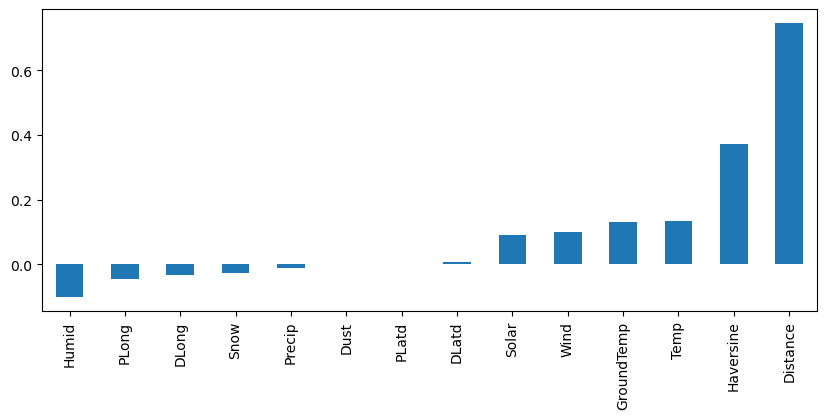

In [18]:
plt.figure(figsize=(10,4), dpi=100)
df_corr['Duration'].sort_values()[:-1].plot(kind='bar');

- Distance and Haversine are highly corelated with Duration

### Distribution of all features

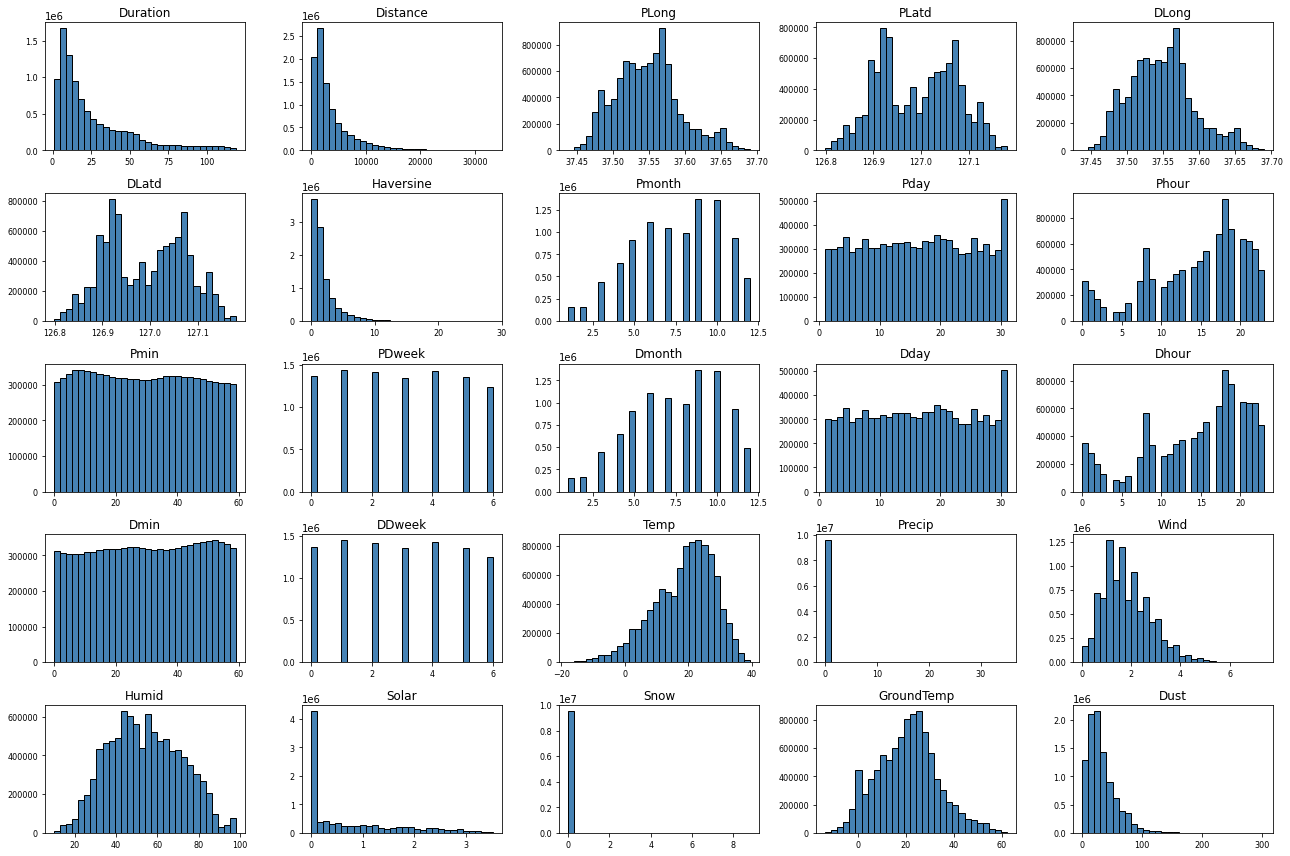

In [11]:
df.hist(bins=30, color='steelblue', edgecolor='black', linewidth=1.0,
        xlabelsize=8, ylabelsize=8, grid=False); 
plt.tight_layout(rect=(0, 0, 3, 3))

- Most of the trips are snow and radiation free.
- The distributions of Duration, distance and Haversine are similar as they are highly correlated.

### Scatter plots

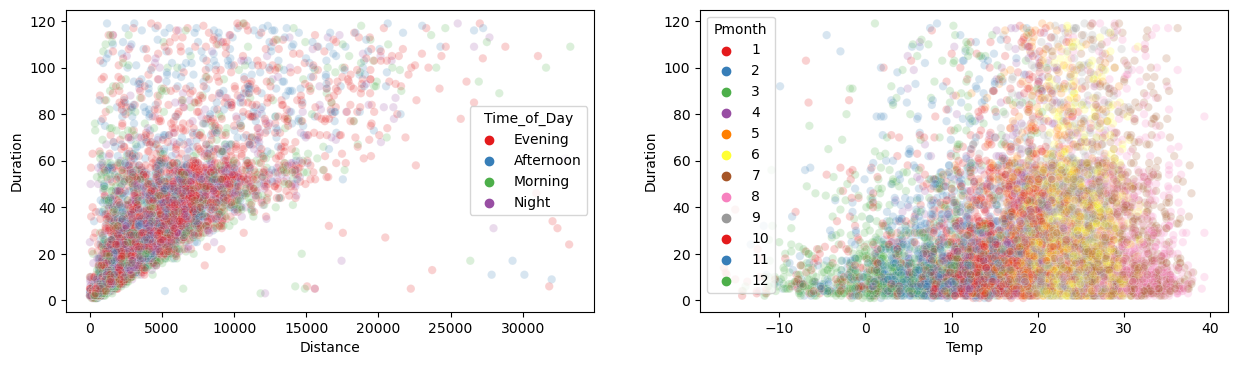

In [19]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15,4), dpi=100)

sns.scatterplot(data=df, x='Distance', y='Duration', palette='Set1', alpha=0.2, ax=ax[0], hue='Time_of_Day');
sns.scatterplot(data=df, x='Temp', y='Duration', palette='Set1', alpha=0.2, ax=ax[1], hue='Pmonth');

- For small distances, the duration is small but with large variance
- Majority of trips are in evening
- The Duration is also affected by the Temp which is indeed correlated to month of the year

### Count plots

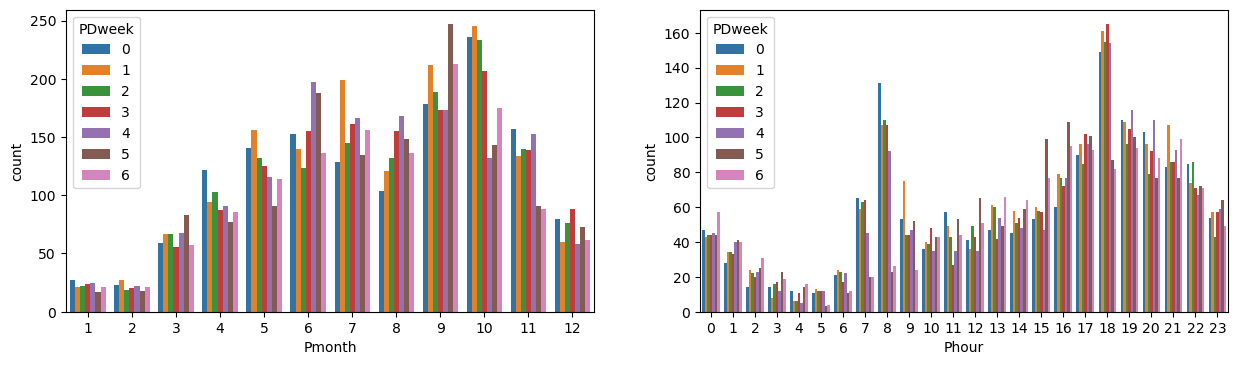

In [20]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15,4), dpi=100)

sns.countplot(data=df, x='Pmonth', hue='PDweek', ax=ax[0]);
sns.countplot(data=df, x='Phour', hue='PDweek', ax=ax[1]);

- Sept and Oct (autumn) have the maximum no. of trips while Dec-March (winter) has a lot less no. of trips
- The peaks for Phour counts is around 8am and b/w 5-9pm which is usual office timings

### Box and Bar plots

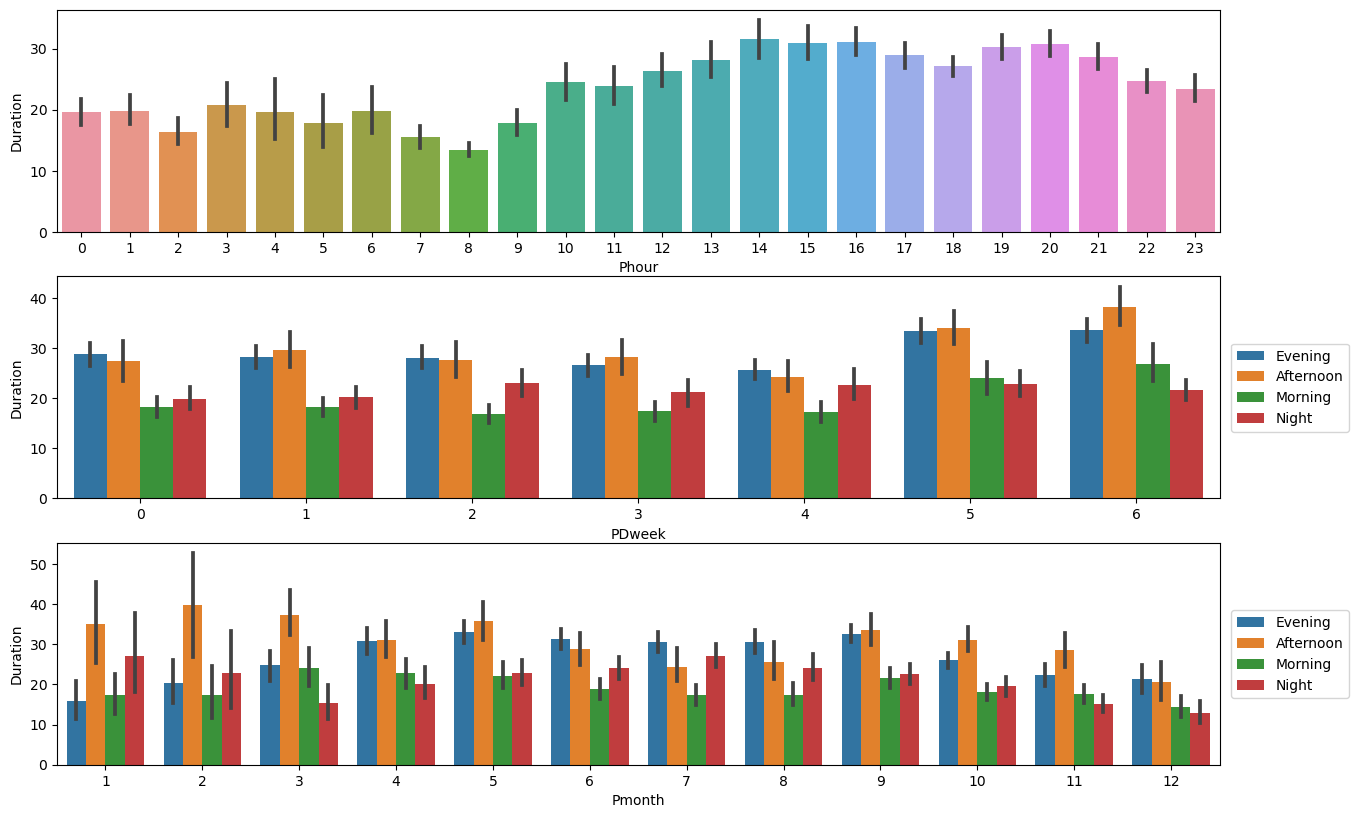

In [24]:
fig, ax = plt.subplots(ncols=1, nrows=3, figsize=(15,10), dpi=100)

sns.barplot(data=df, x='Phour', y='Duration', ax=ax[0]);
sns.barplot(data=df, x='PDweek', y='Duration', ax=ax[1], hue='Time_of_Day');
ax[1].legend(loc=(1.01,0.3));
sns.barplot(data=df, x='Pmonth', y='Duration', ax=ax[2], hue='Time_of_Day');
ax[2].legend(loc=(1.01,0.3));


- Although the one of the peaks of Phour count was around 8am, the mean duration is actually minimum at 8am!  
- Note that the average duartion on Fri and Sat is the highest
- In winters most of the trips are in afternoon, while in summer most of the trips are in the evening

### Pairplot

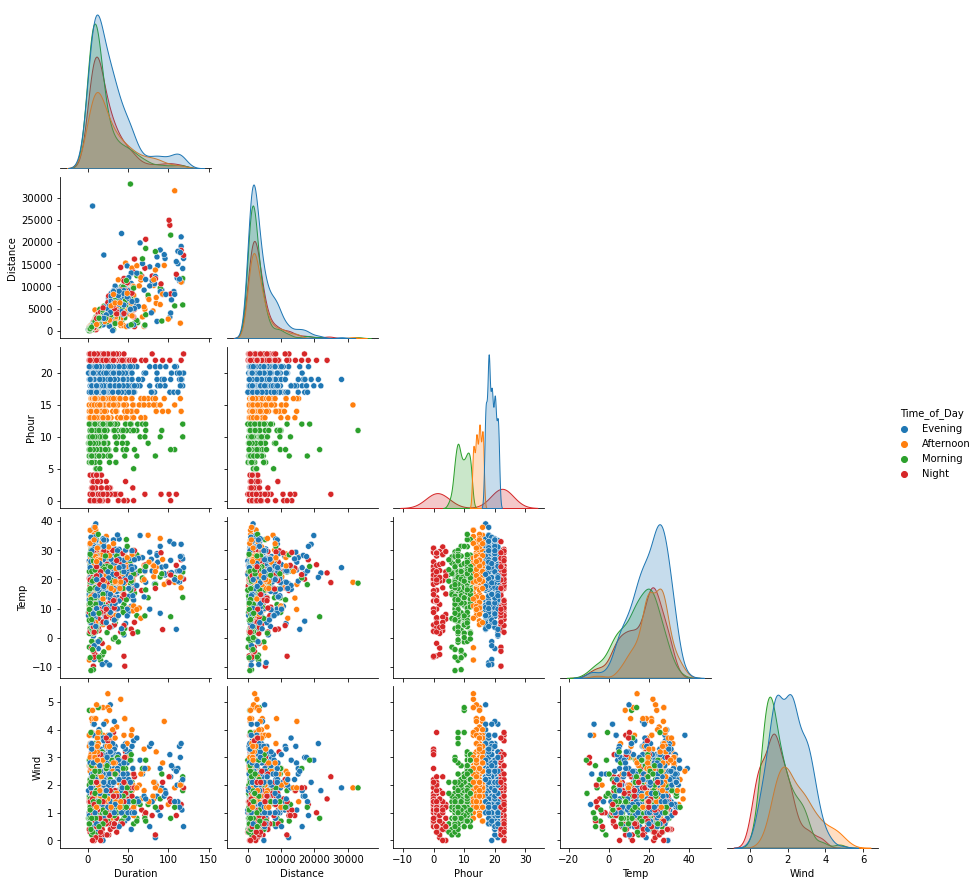

In [37]:
cols = ['Duration', 'Distance', 'Phour', 'Temp', 'Wind', 'Time_of_Day']
sns.pairplot(df[cols], hue='Time_of_Day', diag_kind='kde', corner=True, );

- The kde plots for different Time_of_Day shows that a large no. of trips happen in mornings and evenings. 